In [25]:
# 켈리포니아 주택가격 데이터로 함수형 유연한 모델 생성
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

housing = fetch_california_housing()
print(housing.keys())
print(housing.data[:3], type(housing.data))
print(housing.target[:3], type(housing.data))
print(housing.feature_names)
print(housing.target_names)
print(housing.data.shape) # (20640, 8)


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]] <class 'numpy.ndarray'>
[4.526 3.585 3.521] <class 'numpy.ndarray'>
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']
(20640, 8)


In [26]:
# train_all / test
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, test_size = 0.2, random_state = 42)
print(x_train_all.shape, x_test.shape, y_train_all.shape, y_test.shape)

# train / validation
x_train, x_valid, y_train, y_valid = train_test_split(housing.data, housing.target, test_size = 0.3, random_state = 42)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

print(x_train[:3])

# 표준화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
print(x_train[:3])

(16512, 8) (4128, 8) (16512,) (4128,)
(14448, 8) (6192, 8) (14448,) (6192,)
[[ 4.13120000e+00  3.50000000e+01  5.88235294e+00  9.75490196e-01
   1.21800000e+03  2.98529412e+00  3.39300000e+01 -1.18020000e+02]
 [ 2.86310000e+00  2.00000000e+01  4.40120968e+00  1.07661290e+00
   9.99000000e+02  2.01411290e+00  3.27900000e+01 -1.17090000e+02]
 [ 4.20260000e+00  2.40000000e+01  5.61754386e+00  9.89473684e-01
   7.31000000e+02  2.56491228e+00  3.45900000e+01 -1.20140000e+02]]
[[ 0.13350629  0.50935748  0.18106017 -0.27384968 -0.18411678 -0.01082519
  -0.80568191  0.78093406]
 [-0.53221805 -0.67987313 -0.42262953 -0.04786832 -0.37619075 -0.08931585
  -1.33947268  1.24526986]
 [ 0.1709897  -0.36274497  0.07312833 -0.24260044 -0.61124018 -0.04480037
  -0.49664515 -0.27755183]]


Sequential api ---단순한 방법으로 MLP---


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
452/452 - 1s - 2ms/step - loss: 1.2789 - mse: 1.2789 - val_loss: 0.6012 - val_mse: 0.6012
Epoch 2/20
452/452 - 0s - 1ms/step - loss: 0.5602 - mse: 0.5602 - val_loss: 0.6636 - val_mse: 0.6636
Epoch 3/20
452/452 - 0s - 1ms/step - loss: 0.4493 - mse: 0.4493 - val_loss: 1.1326 - val_mse: 1.1326
Epoch 4/20
452/452 - 0s - 1ms/step - loss: 0.4218 - mse: 0.4218 - val_loss: 1.4920 - val_mse: 1.4920
Epoch 5/20
452/452 - 0s - 1ms/step - loss: 0.3990 - mse: 0.3990 - val_loss: 1.8843 - val_mse: 1.8843
Epoch 6/20
452/452 - 0s - 1ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 2.1566 - val_mse: 2.1566
Epoch 7/20
452/452 - 0s - 1ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 2.5633 - val_mse: 2.5633
Epoch 8/20
452/452 - 0s - 1ms/step - loss: 0.3745 - mse: 0.3745 - val_loss: 2.8045 - val_mse: 2.8045
Epoch 9/20
452/452 - 1s - 1ms/step - loss: 0.3694 - mse: 0.3694 - val_loss: 3.2437 - val_mse: 3.2437
Epoch 10/20
452/452 - 0s - 1ms/step - loss: 0.3633 - mse: 0.3633 - val_loss: 3.3834 - 

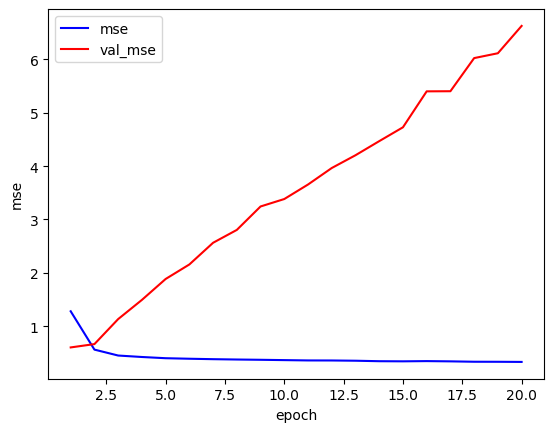

In [27]:
print('Sequential api ---단순한 방법으로 MLP---')
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
print(model.summary())

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(x_train, y_train, epochs=20, \
                    validation_data=(x_valid, y_valid), verbose=2)
print('eveluate: ', model.evaluate(x_test, y_test, verbose=0))

# test 일부 자료로 예측
x_new = x_test[:3]
y_pred = model.predict(x_new)
print('예측값: ', y_pred.ravel())
print('실제값: ', y_test[:3])

plt.plot(range(1, 21), history.history['mse'], c='b', label='mse')
plt.plot(range(1, 21), history.history['val_mse'], c='r', label='val_mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()

functional api ---단순한 방법으로 MLP---
Epoch 1/20
452/452 - 1s - 3ms/step - loss: 0.9656 - mse: 0.9656 - val_loss: 0.5601 - val_mse: 0.5601
Epoch 2/20
452/452 - 1s - 1ms/step - loss: 0.4385 - mse: 0.4385 - val_loss: 1.1665 - val_mse: 1.1665
Epoch 3/20
452/452 - 1s - 1ms/step - loss: 0.4062 - mse: 0.4062 - val_loss: 1.9463 - val_mse: 1.9463
Epoch 4/20
452/452 - 1s - 1ms/step - loss: 0.4349 - mse: 0.4349 - val_loss: 2.4004 - val_mse: 2.4004
Epoch 5/20
452/452 - 1s - 1ms/step - loss: 0.3653 - mse: 0.3653 - val_loss: 3.1171 - val_mse: 3.1171
Epoch 6/20
452/452 - 1s - 1ms/step - loss: 0.3516 - mse: 0.3516 - val_loss: 3.6413 - val_mse: 3.6413
Epoch 7/20
452/452 - 1s - 1ms/step - loss: 0.3445 - mse: 0.3445 - val_loss: 4.6417 - val_mse: 4.6417
Epoch 8/20
452/452 - 1s - 1ms/step - loss: 0.3363 - mse: 0.3363 - val_loss: 4.9377 - val_mse: 4.9377
Epoch 9/20
452/452 - 1s - 1ms/step - loss: 0.3410 - mse: 0.3410 - val_loss: 5.5932 - val_mse: 5.5932
Epoch 10/20
452/452 - 1s - 1ms/step - loss: 0.3185 - mse:

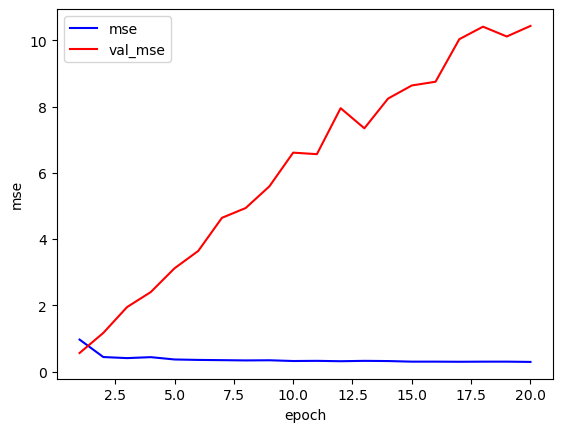

In [28]:
print('functional api ---단순한 방법으로 MLP---')
input_ = Input(shape=x_train.shape[1:])
net1 = Dense(units=32, activation='relu')(input_)
net2 = Dense(units=32, activation='relu')(net1)
concat = Concatenate()([input_, net2])
output = Dense(units=1)(concat)

model2 = Model(inputs=[input_], outputs=[output])

model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
history2 = model2.fit(x_train, y_train, epochs=20, \
                    validation_data=(x_valid, y_valid), verbose=2)


plt.plot(range(1, 21), history2.history['mse'], c='b', label='mse')
plt.plot(range(1, 21), history2.history['val_mse'], c='r', label='val_mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()


functional api 2 --일부 특성은 짧은 경로로 전달, 다른 특성은 깊은 경로로 전달 MLP--
Epoch 1/20
452/452 - 1s - 3ms/step - loss: 1.2715 - mse: 1.2715 - val_loss: 0.7703 - val_mse: 0.7703
Epoch 2/20
452/452 - 1s - 1ms/step - loss: 0.4949 - mse: 0.4949 - val_loss: 1.6471 - val_mse: 1.6471
Epoch 3/20
452/452 - 1s - 1ms/step - loss: 0.4295 - mse: 0.4295 - val_loss: 2.0763 - val_mse: 2.0763
Epoch 4/20
452/452 - 1s - 1ms/step - loss: 0.4017 - mse: 0.4017 - val_loss: 2.7644 - val_mse: 2.7644
Epoch 5/20
452/452 - 1s - 1ms/step - loss: 0.3903 - mse: 0.3903 - val_loss: 3.1299 - val_mse: 3.1299
Epoch 6/20
452/452 - 1s - 1ms/step - loss: 0.3740 - mse: 0.3740 - val_loss: 3.4911 - val_mse: 3.4911
Epoch 7/20
452/452 - 1s - 1ms/step - loss: 0.3681 - mse: 0.3681 - val_loss: 4.0235 - val_mse: 4.0235
Epoch 8/20
452/452 - 1s - 1ms/step - loss: 0.3569 - mse: 0.3569 - val_loss: 4.7614 - val_mse: 4.7614
Epoch 9/20
452/452 - 1s - 2ms/step - loss: 0.3497 - mse: 0.3497 - val_loss: 4.8470 - val_mse: 4.8470
Epoch 10/20
452/452 - 1s - 1ms/

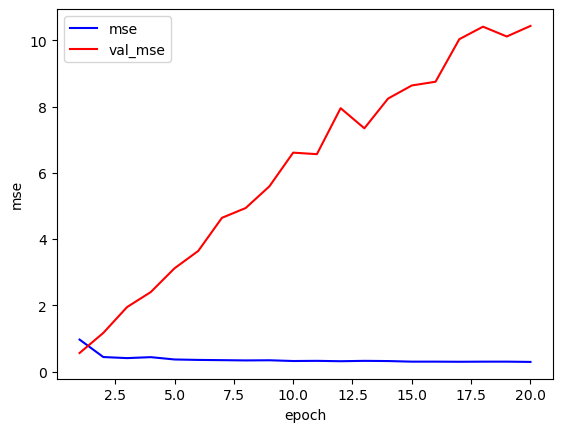

In [35]:
print('functional api 2 --일부 특성은 짧은 경로로 전달, 다른 특성은 깊은 경로로 전달 MLP--')
# 예를 들어 5개(0 ~ 4)는 짧은 경로, 6개의 특성(2 ~ 7)은 깊은 경로로 전달
input_a = Input(shape=[5], name='wide_input')
input_b = Input(shape=[6], name='deep_input')
net1 = Dense(units=32, activation='relu')(input_b)
net2 = Dense(units=32, activation='relu')(net1)
concat = Concatenate()([input_a, net2])
output = Dense(units=1, name='output')(concat)

model3 = Model(inputs=[input_a, input_b], outputs=[output])

model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

# fit()을 호출할 때 하나의 입력 행렬 x_train을 전달하는 것이 아니라
# 입력마다 하나씩 행렬의 튜플(x_train_a, x_train_b)을 전달해야함
x_train_a, x_trian_b = x_train[:, :5], x_train[:, 2:] 
x_valid_a, x_valid_b = x_valid[:, :5], x_valid[:, 2:] 
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]   # evaluate 용
x_new_a, x_new_b = x_test_a[:, :5], x_test_b[:, 2:]   # predict 용

history3 = model3.fit((x_train_a, x_trian_b),y_train, epochs=20, validation_data=((x_valid_a,x_valid_b), y_valid), verbose=2)
print('eveluate3: ', model3.evaluate((x_test_a, x_test_b), y_test, verbose=0))


plt.plot(range(1, 21), history2.history['mse'], c='b', label='mse')
plt.plot(range(1, 21), history2.history['val_mse'], c='r', label='val_mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.show()
